In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# load data from cereal dataset

data = pd.read_csv('cereal.csv')

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.7+ KB


In [67]:
#find missing values in dataset
for column in data.columns:
    if not data[data[column] == -1].index.empty:
        print(data[data[column] == -1].index)
        
#found 3 rows with missing value(row: 57, 4, 20). I will just delete them

Int64Index([57], dtype='int64')
Int64Index([57], dtype='int64')
Int64Index([4, 20], dtype='int64')


In [68]:
data.drop([data.index[57], data.index[4], data.index[20]], axis=0, inplace=True)

In [70]:
#drop 'name' feature, since it has 77 different names.

data.drop(['name'], axis=1, inplace=True)

In [71]:
# print unique values of each feature
for column in data.columns[:-1]:
    if len(data[column].unique()) > 15:
        print(column.upper(), '_15', data[column].unique())
    else:
        print(column.upper(), data[column].unique())

MFR ['N' 'Q' 'K' 'G' 'R' 'P' 'A']
TYPE ['C' 'H']
CALORIES [ 70 120  50 110 130  90 100 140 150 160  80]
PROTEIN [4 3 2 1 6]
FAT [1 5 0 2 3]
SODIUM _15 [130  15 260 140 180 125 210 200 220 290 280  90 190   0 160 240 135  45
 170  75 250 150  95 320  70 230]
FIBER [10.   2.   9.  14.   1.5  1.   4.   5.   0.   3.   6.   2.5]
CARBO _15 [ 5.   8.   7.  10.5 11.  18.  15.  13.  12.  17.  22.  21.  10.  14.
 11.5 20.  16.  13.5 23.  19.   9. ]
SUGARS _15 [ 6  8  5  0 10 14 12  1  9  7 13  3  2 11 15  4]
POTASS _15 [280 135 320 330  70  30 100 125 190  35 105  45  55  25  20  65 160 120
  80 200  40  85  90  60  95 170 130 260  15  50 110 240 140 230 115]
VITAMINS [ 25   0 100]
SHELF [3 1 2]
WEIGHT [1.   1.33 1.25 1.3  1.5  0.5  0.83]
CUPS [0.33 1.   0.5  0.75 0.67 1.25 0.8  0.88 0.25 1.33 1.5  1.13]


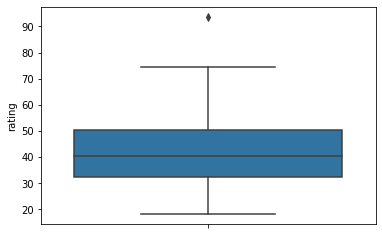

In [72]:
fig = sns.boxplot(y='rating', data=data)

In [73]:
# found one outlier, drop it 
data.drop(data[data.rating > 90].index, axis=0, inplace=True)

1. Categorical variables (box plot) : mfr, type
2. Numerical variables (since the groups in these features are countable, i will use both box and scatter plot) : calories, protein, fat, fiber, vitamins, shelf, weight, cups, sodium, carbo, sugars, potass

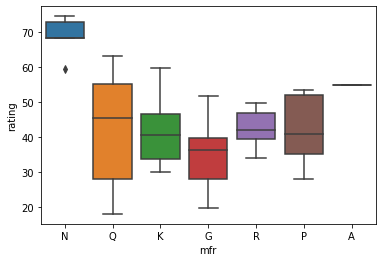

In [74]:
###  MFR
#############
plt.figure(figsize=(6, 4))
fig = sns.boxplot(x='mfr', y="rating", data=data)

# from the plot, we can see that mfr N has higher rating than all other mfrs range(60 - 75)
# other mfrs range(20 - 64), overlap in same range
# summary: we can transform this feature to keep only 2 groups: N, not N(combine Q, K, R, G, P, A)

In [75]:
# convert labels(object) in mfr to numerical value(float) 
# convert N to 0, others(Q, K, R, G, P, A) to 1
mfr_label_encode = {
    'N': 0,
    'Q': 1,
    'K': 1,
    'R': 1,
    'G': 1,
    'P': 1,
    'A': 1,
} 
data['mfr'] = data['mfr'].map(mfr_label_encode)


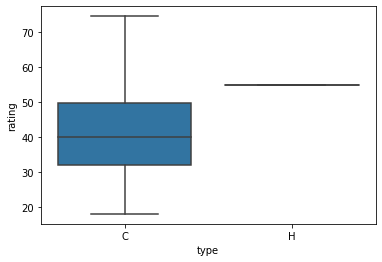

In [58]:
###  TYPE
#############
plt.figure(figsize=(6, 4))
fig = sns.boxplot(x='type', y="rating", data=data)


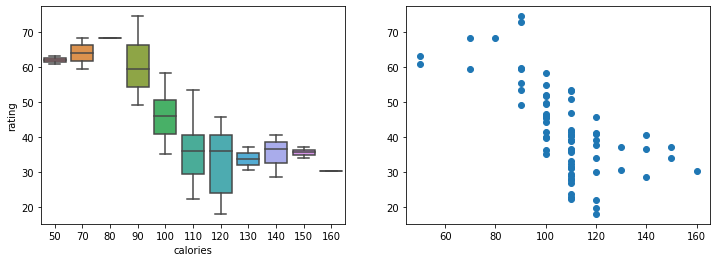

In [59]:
###  CALORIES
#############
fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

var = 'calories'
sns.boxplot(x=var, y="rating", data=data, ax=axes[0])
plt.scatter(x=data[var], y=data.rating)

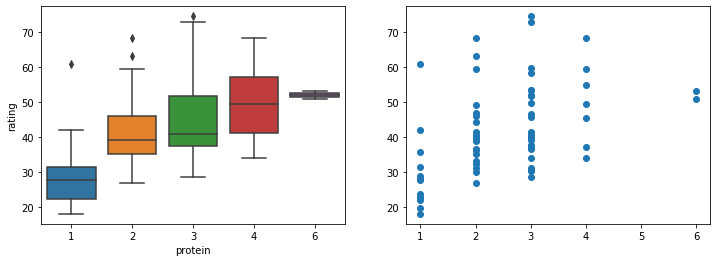

In [15]:
###  PROTEIN
#############
fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

var = 'protein'
sns.boxplot(x=var, y="rating", data=data, ax=axes[0])
plt.scatter(x=data[var], y=data.rating)

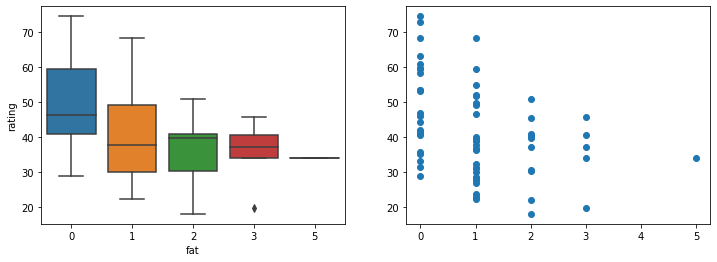

In [16]:
###  FAT
#############
fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

var = 'fat'
sns.boxplot(x=var, y="rating", data=data, ax=axes[0])
plt.scatter(x=data[var], y=data.rating)

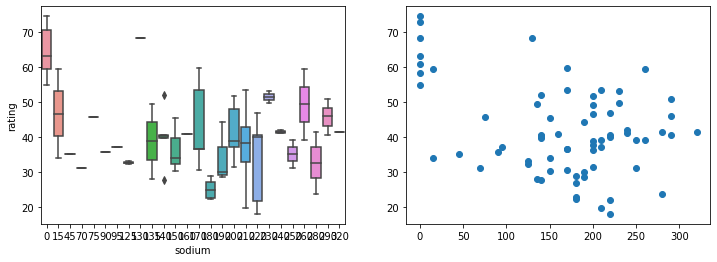

In [17]:
###  SODIUM
#############
fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

var = 'sodium'
sns.boxplot(x=var, y="rating", data=data, ax=axes[0])
plt.scatter(x=data[var], y=data.rating)

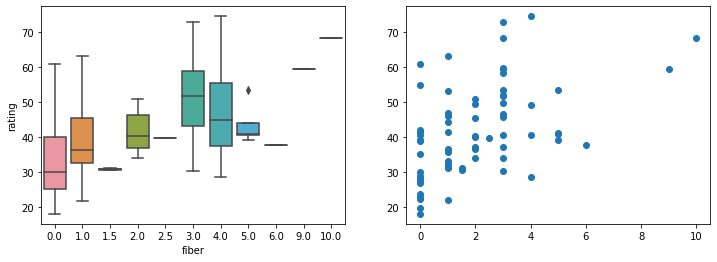

In [18]:
###  FIBER
#############
fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

var = 'fiber'
sns.boxplot(x=var, y="rating", data=data, ax=axes[0])
plt.scatter(x=data[var], y=data.rating)

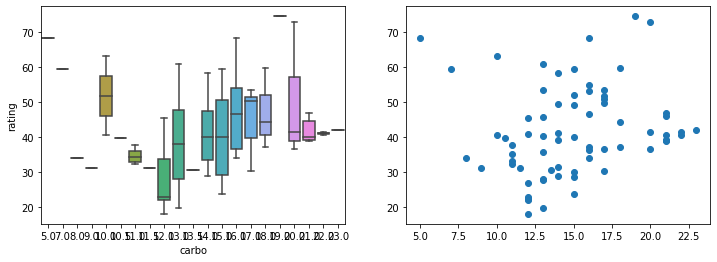

In [19]:
###  CARBO
#############
fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

var = 'carbo'
sns.boxplot(x=var, y="rating", data=data, ax=axes[0])
plt.scatter(x=data[var], y=data.rating)

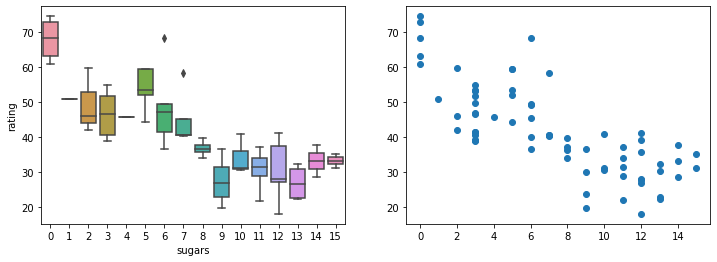

In [20]:
###  SUGARS
#############
fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

var = 'sugars'
sns.boxplot(x=var, y="rating", data=data, ax=axes[0])
plt.scatter(x=data[var], y=data.rating)

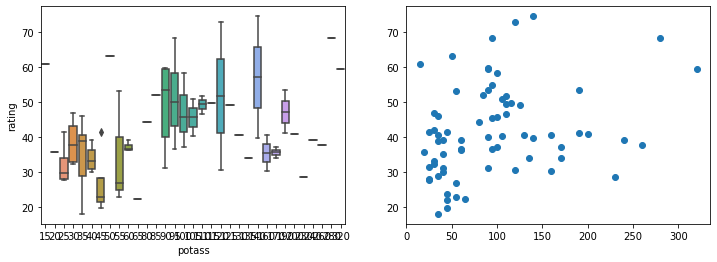

In [21]:
###  POTASS
#############
fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

var = 'potass'
sns.boxplot(x=var, y="rating", data=data, ax=axes[0])
plt.scatter(x=data[var], y=data.rating)

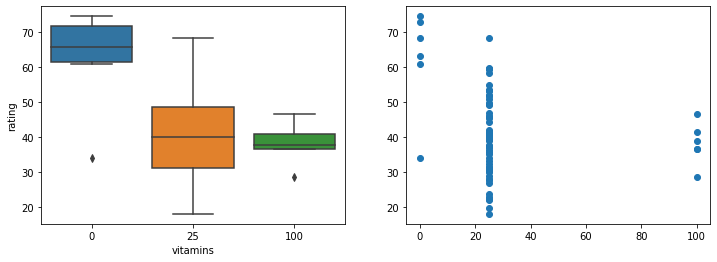

In [22]:
###  VITAMINS
#############
fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

var = 'vitamins'
sns.boxplot(x=var, y="rating", data=data, ax=axes[0])
plt.scatter(x=data[var], y=data.rating)

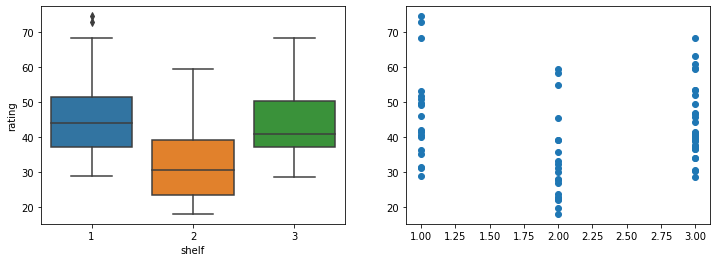

In [23]:
###  SHELF
#############
fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

var = 'shelf'
sns.boxplot(x=var, y="rating", data=data, ax=axes[0])
plt.scatter(x=data[var], y=data.rating)

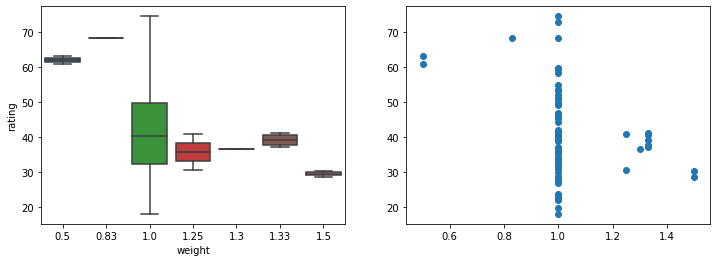

In [24]:
###  WEIGHT
#############
fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

var = 'weight'
sns.boxplot(x=var, y="rating", data=data, ax=axes[0])
plt.scatter(x=data[var], y=data.rating)

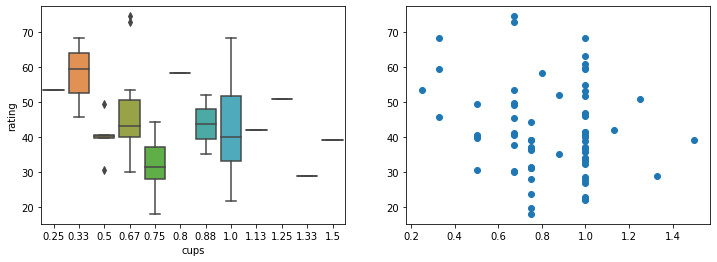

In [25]:
###  CUPS
#############
fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

var = 'cups'
sns.boxplot(x=var, y="rating", data=data, ax=axes[0])
plt.scatter(x=data[var], y=data.rating)

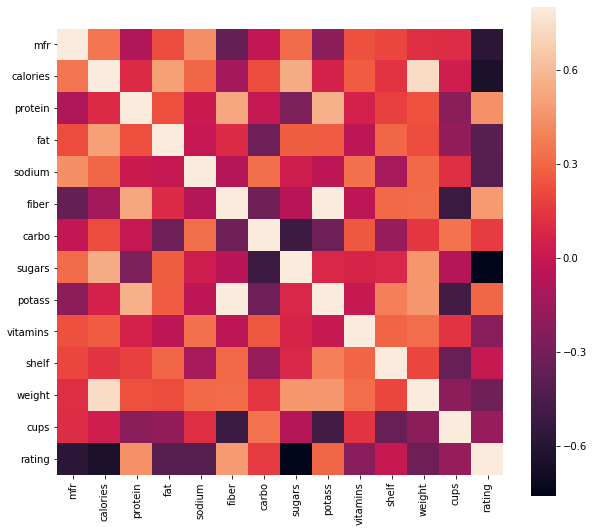

In [63]:
# visulize the Correlation matrix, heatmap
corrmat = data.corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corrmat, vmax=0.8, square=True);

# the heatmap tell us that: 
# 1. 'fiber' and 'potass' have strong correlation
# 2. 'weight' and 'calories' have strong correlation
# multicollinearity, two features have strong correlation give almost the same infomation
# analysis the following box and scatter plots to determine which feture should be kept 

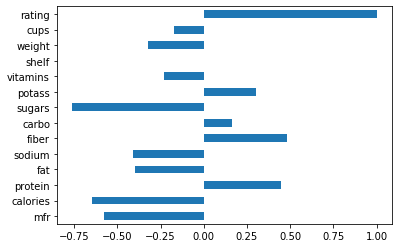

In [64]:
# plot importance of features, find features that have strong correlation with rating
rating_corr = data[data.columns[:]].corr()['rating']
rating_corr.plot(kind = "barh")

# the plot shows that ['fiber', 'protein', 'sugars', 'calories', 'mfr'] are strong correlated with rating

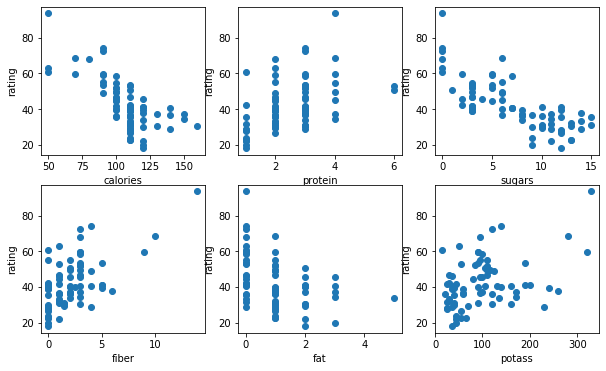

In [43]:
plt.figure(figsize=(10, 6))

lin_list = ['calories', 'protein', 'sugars', 'fiber', 'fat', 'potass']
position = [231,232,233,234,235,236]
for column, pos in zip(lin_list, position):
    plt.subplot(pos, xlabel=column, ylabel='rating')
    plt.scatter(x=data[column], y=data.rating)


# plt.subplot(221, xlabel='calories', ylabel='rating')
# plt.scatter(x=data.calories, y=data.rating)

# plt.subplot(222, xlabel='protein', ylabel='rating')
# plt.scatter(x=data.protein, y=data.rating)

# plt.subplot(223, xlabel='sugars', ylabel='rating')
# plt.scatter(x=data.sugars, y=data.rating)

# plt.subplot(224, xlabel='fiber', ylabel='rating')
# plt.scatter(x=data.fiber, y=data.rating)

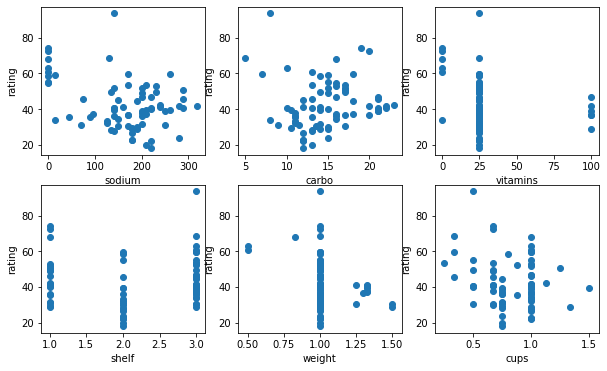

In [46]:
plt.figure(figsize=(10, 6))
num_drop_list = ['sodium', 'carbo', 'vitamins', 'shelf', 'weight', 'cups']
position = [231,232,233,234,235,236]
for column, pos in zip(num_drop_list, position):
    plt.subplot(pos, xlabel=column, ylabel='rating')
    plt.scatter(x=data[column], y=data.rating)

1. from the plots and heatmap, we can see that the following features have no strong linear relationship and correlation with rating, I will drop these features. ['type', 'sodium', 'carbo', 'potass', 'vitamins', 'shelf', 'weight', 'cups']

In [76]:
# drop features
drop_list = ['type', 'sodium', 'carbo', 'potass', 'vitamins', 'shelf', 'weight', 'cups']
data.drop(drop_list, axis=1, inplace=True)

In [79]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [90]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1:]

In [91]:
lr = LinearRegression().fit(X, Y)

In [92]:
lr.coef_

array([[-10.60477707,  -0.15470399,   3.04643971,  -2.51547097,
          1.5456342 ,  -1.28782187]])

In [96]:
data.to_csv('cereal_eda.csv', index=False)